In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

waterqual_df = pd.read_csv('https://github.com/mmcintire00/bootcamp_projects/blob/main/water-potability-prediction/data/water_potability.csv?raw=true')

In [4]:
waterqual_df.shape

(3276, 10)

In [5]:
waterqual_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# percentage of null values for each variable
(waterqual_df.isnull().sum()*100)/(waterqual_df.isnull().count())

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
# continuous float variables...will fill null values with mean
waterqual_df['ph'] = waterqual_df['ph'].fillna(waterqual_df['ph'].mean())
waterqual_df['Sulfate'] = waterqual_df['Sulfate'].fillna(waterqual_df['Sulfate'].mean())
waterqual_df['Trihalomethanes'] = waterqual_df['Trihalomethanes'].fillna(waterqual_df['Trihalomethanes'].mean())

In [8]:
#check to see if null values have been removed
(waterqual_df.isnull().sum()*100)/(waterqual_df.isnull().count())

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

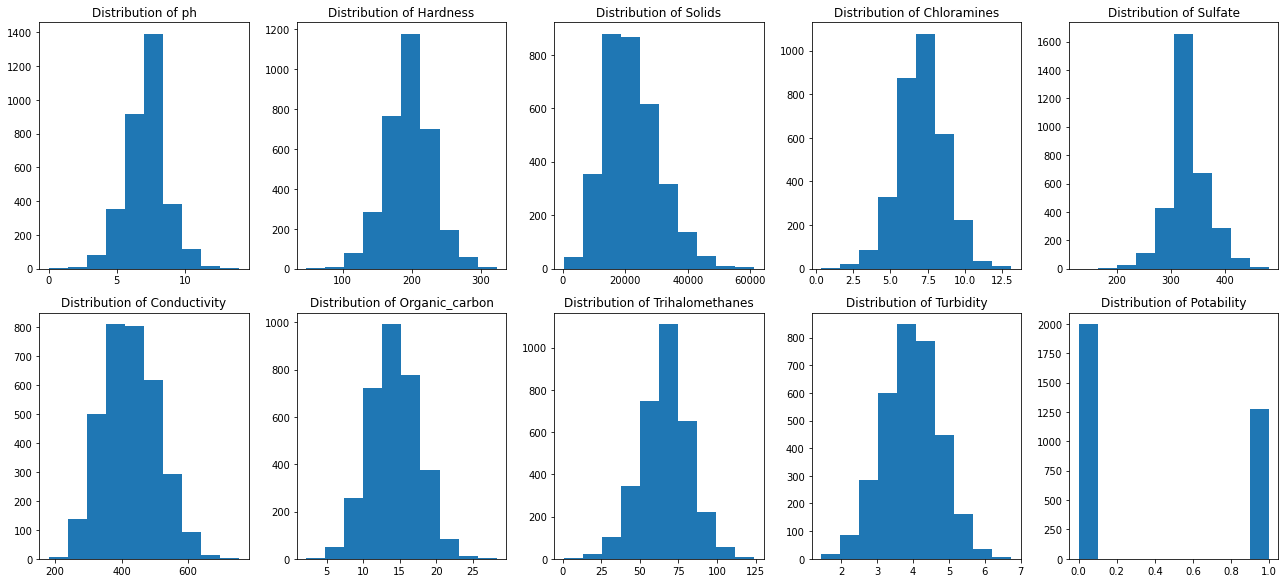

In [9]:
# compare distribution of data with/without null values
plt.figure(figsize=(18,12))

var_list = waterqual_df.columns.unique()

for index, column in enumerate(var_list):
  plt.subplot(3,5,index+1)
  plt.hist(waterqual_df[column])
  plt.title('Distribution of {}'.format(column))

plt.tight_layout()
plt.show()

In [10]:
# normality of distributions
print(stats.describe(waterqual_df['ph']))
print(stats.describe(waterqual_df['Sulfate']))
print(stats.describe(waterqual_df['Hardness']))
print(stats.describe(waterqual_df['Solids']))
print(stats.describe(waterqual_df['Chloramines']))
print(stats.describe(waterqual_df['Conductivity']))
print(stats.describe(waterqual_df['Organic_carbon']))
print(stats.describe(waterqual_df['Trihalomethanes']))
print(stats.describe(waterqual_df['Turbidity']))

DescribeResult(nobs=3276, minmax=(0.0, 13.999999999999998), mean=7.080794504276834, variance=2.1607705532875494, skewness=0.02778315290297795, kurtosis=1.3721594794857088)
DescribeResult(nobs=3276, minmax=(129.00000000000003, 481.03064230599716), mean=333.7757766108134, variance=1306.2884142064602, skewness=-0.041165512875302186, kurtosis=1.785402981768775)
DescribeResult(nobs=3276, minmax=(47.431999999999995, 323.124), mean=196.36949601730154, variance=1081.0787147379976, skewness=-0.03932368888404235, kurtosis=0.6130013182749221)
DescribeResult(nobs=3276, minmax=(320.942611274359, 61227.196007712126), mean=22014.092526077104, variance=76887834.36189838, skewness=0.6213498181329244, kurtosis=0.44031956762263125)
DescribeResult(nobs=3276, minmax=(0.3520000000000003, 13.127000000000002), mean=7.122276793425786, variance=2.5061577659058702, skewness=-0.012092899840854135, kurtosis=0.5871702727436965)
DescribeResult(nobs=3276, minmax=(181.483753985146, 753.3426195583046), mean=426.2051106

In [11]:
corr_with_qual = waterqual_df.corrwith(waterqual_df['Potability']).sort_values(ascending=False)
print(corr_with_qual)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
dtype: float64


In [12]:
# split data into features (X) and target (Y)
X = waterqual_df.drop(columns='Potability') # model features
Y = waterqual_df['Potability'] # target 

# scale all values 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# add a constant
X = sm.add_constant(X)

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [13]:
X.describe() # check that data scaling successful

,const,0,1,2,3,4,5,6,7,8
count,3276.0,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,1.0,-1.093278e-16,2.123289e-16,-6.286519e-17,5.102247e-16,7.356524e-16,1.878161e-16,-6.134016e-18,1.824955e-16,5.571449e-16
std,0.0,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,1.0,-4.817747e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.666636e+00,-3.028290e+00,-3.653635e+00,-4.164160e+00,-3.225560e+00
25%,1.0,-5.464412e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.616071e-01,-7.482911e-01,-6.709187e-01,-6.182751e-01,-6.755095e-01
50%,1.0,-8.460387e-15,1.819424e-02,-1.238999e-01,5.068209e-03,-1.572994e-15,-5.345935e-02,-2.014487e-02,0.000000e+00,-1.507005e-02
75%,1.0,5.370064e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.596379e-01,6.878605e-01,6.870970e-01,6.513609e-01,6.837866e-01
max,1.0,4.707802e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.074895e+00,4.048144e+00,4.237147e+00,3.653325e+00,3.552921e+00


In [14]:
sklearn_pca = PCA(n_components=0.95)
sklearn_pca.fit(X)
sklearn_pca.explained_variance_ratio_

array([0.13338306, 0.12632158, 0.11732755, 0.11370298, 0.11044415,
       0.10744622, 0.10566013, 0.0985114 , 0.08720294])

In [15]:
X = sklearn_pca.transform(X)

In [16]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, random_state=42)
lr.fit(X_train, y_train)

print('Training score: %s' % lr.score(X_train, y_train))
print('Test score: %s' % lr.score(X_test, y_test))
print('Number of iterations: %s' % lr.n_iter_[0])

Training score: 0.6053435114503817
Test score: 0.6280487804878049
Number of iterations: 17


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(X_train,y_train)

print('training score: {:.3f}'.format(knn.score(X_train, y_train)))
print('test score: {:.3f}'.format(knn.score(X_test, y_test)))

training score: 0.663
test score: 0.672


In [18]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

Y_ = svm.predict(X_test)
svm.score(X_test, y_test)

0.6280487804878049

In [19]:
cross_val_score(svm, X_test, y_test, cv=10)

array([0.63636364, 0.63636364, 0.62121212, 0.62121212, 0.62121212,
       0.62121212, 0.63076923, 0.63076923, 0.63076923, 0.63076923])

In [20]:
rfc = ensemble.RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

print('Training score: %s' % np.mean(cross_val_score(rfc, X_train, y_train, cv=5)))
print('Test score: %s' % np.mean(cross_val_score(rfc, X_test, y_test, cv=5)))

Training score: 0.6774809160305344
Test score: 0.6525098311357853
